# Assignment 2

## Problem 1

### Part a)

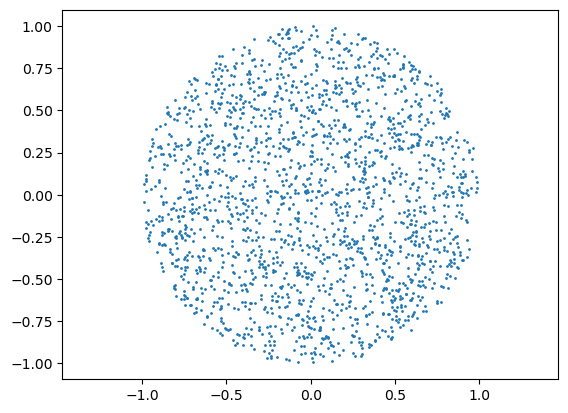

In [89]:
import numpy as np
import matplotlib.pyplot as plt

R = 1
num_points = 2000
accepted_points = []

while len(accepted_points) < num_points:
    x = np.random.uniform(-R, R)
    y = np.random.uniform(-R, R)
    if x**2 + y**2 <= R**2:
        accepted_points.append((x, y))

x_vals, y_vals = zip(*accepted_points)

plt.scatter(x_vals, y_vals, s=1)
plt.axis('equal')
plt.show()

### Part b)

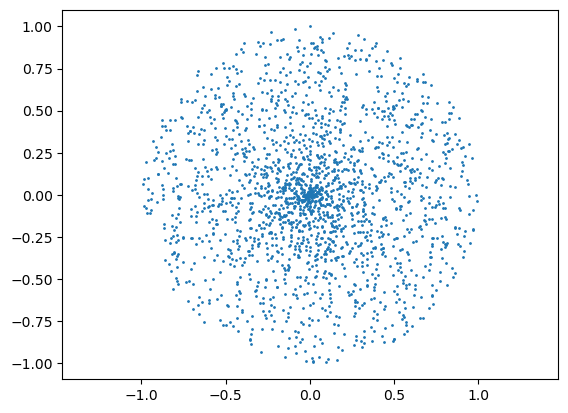

In [90]:
R = 1
num_points = 2000

r = np.random.uniform(0, R, num_points)
theta = np.random.uniform(0, 1, num_points) * 2 * np.pi

x_vals = r * np.cos(theta)
y_vals = r * np.sin(theta)

plt.scatter(x_vals, y_vals, s=1)
plt.axis('equal')
plt.show()

Unlike in part a), here the points are not uniformly distributed within the circle. More points are located near the center of the circle and fewer near the edges. This is because the area of each concentric ring increases with  r but sampling  r  uniformly does not account for this change in area. Therefore more points accumulate near the center where the area is smaller.

### Part c)

Derivation:

We are given:

$$
p(r) = C \cdot 2\pi r, \quad \text{for } 0 \leq r \leq R
$$

Our goal is to determine the constant $C$ and find the CDF $F(r)$ to generate $r$.

First we normalize the pdf to Find $C$.

The total probability over the interval $[0, R]$ must be 1:

$$
\int_0^R p(r) , dr = 1
$$

Substitute $p(r)$:

$$
\int_0^R C \cdot 2\pi r , dr = 1
$$

Compute the integral:

$$
C \cdot 2\pi \int_0^R r , dr = 1 \
C \cdot 2\pi \left[ \frac{1}{2} r^2 \Big|_0^R \right] = 1 \
C \cdot 2\pi \left( \frac{1}{2} R^2 \right) = 1 \
C \cdot \pi R^2 = 1
$$

Solve for $C$:

$$
C = \frac{1}{\pi R^2}
$$


Now, the normalized pdf is:

$$
p(r) = \frac{1}{\pi R^2} \cdot 2\pi r = \frac{2r}{R^2}, \quad 0 \leq r \leq R
$$

Now we can find the cdf $F(r)$ since it is is given by:

$$
F(r) = \int_0^r p(s) , ds = \int_0^r \frac{2s}{R^2} , ds
$$

Compute the integral:

$$
F(r) = \frac{2}{R^2} \left[ \frac{1}{2} s^2 \Big|_0^r \right] = \frac{2}{R^2} \left( \frac{1}{2} r^2 \right) = \frac{r^2}{R^2}
$$

So,

$$
F(r) = \left( \frac{r}{R} \right)^2
$$

Now we apply the inverse transformation method

To generate $r$ values according to this distribution, set $F(r)$ equal to a uniform random variable $u$ on $[0, 1]$:

$$
F(r) = u
$$

Substitute $F(r)$:

$$
\left( \frac{r}{R} \right)^2 = u
$$

Solve for $r$:

$$
r = R \sqrt{u}
$$

Conclusion:

The proper transformation for generating $r$ is:

$$
r = R \sqrt{u}
$$

where $u$ is a uniform random variable in $[0, 1]$.

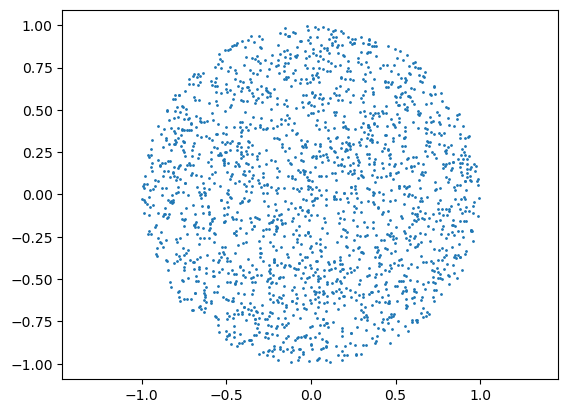

In [91]:
R = 1
num_points = 2000

u = np.random.uniform(0, 1, num_points)
r = R * np.sqrt(u)
theta = np.random.uniform(0, 1, num_points) * 2 * np.pi

x_vals = r * np.cos(theta)
y_vals = r * np.sin(theta)

plt.scatter(x_vals, y_vals, s=1)
plt.axis('equal')
plt.show()

### Part d)

In **part b**, we generated points by selecting the radius r uniformly and the angle uniformly. This method resulted in a higher concentration of points near the center of the circle, leading to a non-uniform distribution. The issue arises because uniformly sampling r does not account for the increasing area with larger r.

In **part c**, we used the inverse distribution method to adjust the sampling of r by setting $r = R\sqrt{u}$, where $u$ is a uniformly distributed random variable in $[0, 1]$. This transformation ensures that the probability density function of r is proportional to r, matching the area element and resulting in a uniform distribution of points across the entire circle. Therefore, part c corrects the non-uniformity observed in part b by properly accounting for the geometry of the circle.

## Problem 2

### Part a)

Derivation:

The pdf is given by:

$$
f(x) = C x^{-3/2}, \quad x \in [1, \infty)
$$

To find $C$, we ensure that the total probability over the support equals 1:

$$
\int_{1}^{\infty} f(x) \, dx = 1
$$

Substitute $f(x)$ into the integral:

$$
\int_{1}^{\infty} C x^{-3/2} \, dx = C \int_{1}^{\infty} x^{-3/2} \, dx = C \left[ -2 x^{-1/2} \right]_{1}^{\infty}
$$

Evaluate the integral:

$$
C \left( \left. -2 x^{-1/2} \right|_{x=\infty} - \left. -2 x^{-1/2} \right|_{x=1} \right) = C \left( 0 - (-2)(1) \right) = 2C
$$

Set the integral equal to 1:

$$
2C = 1 \quad \Rightarrow \quad C = \frac{1}{2}
$$

So the normalized pdf is:

$$
f(x) = \frac{1}{2} x^{-3/2}
$$


Compute the cumulative distribution function:

$$
F(x) = \int_{1}^{x} f(t) \, dt = \int_{1}^{x} \frac{1}{2} t^{-3/2} \, dt = \frac{1}{2} \left[ -2 t^{-1/2} \right]_{1}^{x}
$$

Simplify :

$$
F(x) = \frac{1}{2} \left( -2 x^{-1/2} + 2 \times 1^{-1/2} \right) = 1 - x^{-1/2}
$$

Inverse transformation $x = F^{-1}(y)$:

Set $y = F(x)$ and solve for $x$:

$$
y = 1 - x^{-1/2} \quad \Rightarrow \quad x^{-1/2} = 1 - y
$$

Invert $x^{-1/2}$ to find $x$:

$$
x = \left( \frac{1}{1 - y} \right)^{2}
$$

To simulate data within a practical range and avoid infinite values, we substitute $y$ with $y/A$, where $A = 200,000$. The inverse transformation becomes:

$$
x = \left( \frac{1}{1 - \frac{y}{A}} \right)^{2}
$$

Now:
- Generate $y$ from a uniform distribution $U(0, B]$, where $B = 190,000$ (slightly less than $A$) to prevent division by zero.
- Calculate $x$ using the adjusted inverse transformation.

In [92]:
import numpy as np
import matplotlib.pyplot as plt

A = 200000
B = 190000
num_samples = 1000
num_bins = 30

y = np.random.uniform(0, B, num_samples)

x = (1 / (1 - y / A))**2

### Part b)

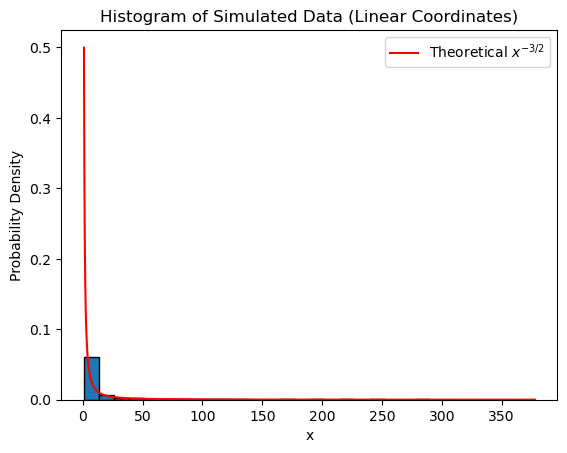

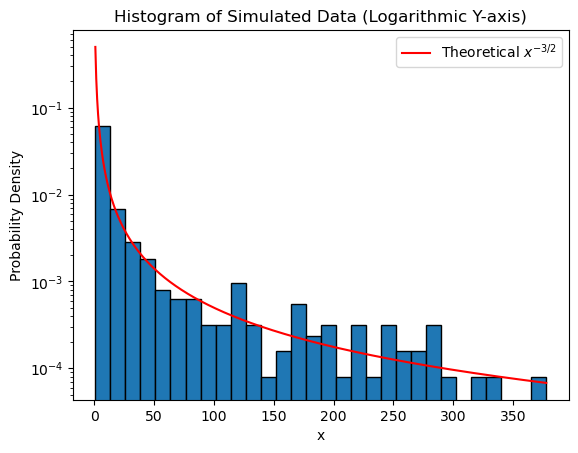

In [93]:
x_values = np.linspace(np.min(x), np.max(x), 1000)
pdf_values = (1/2) * x_values**(-1.5)

plt.hist(x, bins=num_bins, edgecolor='black', density=True)
plt.plot(x_values, pdf_values, 'r-', label=r'Theoretical $x^{-3/2}$')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Histogram of Simulated Data (Linear Coordinates)')
plt.legend()
plt.show()

plt.hist(x, bins=num_bins, edgecolor='black', density=True)
plt.plot(x_values, pdf_values, 'r-', label=r'Theoretical $x^{-3/2}$')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.yscale('log')
plt.title('Histogram of Simulated Data (Logarithmic Y-axis)')
plt.legend()
plt.show()

### Part c)

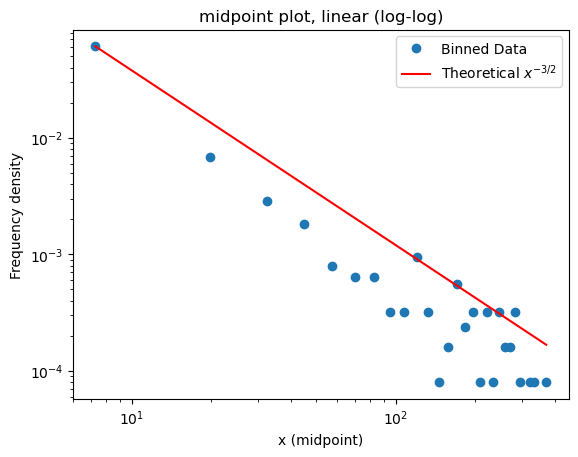

In [94]:
counts, bin_edges = np.histogram(x, bins=num_bins)
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]

frequencies = counts / (num_samples * bin_width)

nonzero = counts > 0
bin_midpoints_nonzero = bin_midpoints[nonzero]
frequencies_nonzero = frequencies[nonzero]

plt.plot(bin_midpoints_nonzero, frequencies_nonzero, 'o', label='Binned Data')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x (midpoint)')
plt.ylabel('Frequency density')
plt.title('midpoint plot, linear (log-log)')

coeff = frequencies_nonzero[0] * bin_midpoints_nonzero[0]**(1.5)
x_fit = np.logspace(np.log10(np.min(bin_midpoints_nonzero)), np.log10(np.max(bin_midpoints_nonzero)), 100)
y_fit = coeff * x_fit**(-1.5)
plt.plot(x_fit, y_fit, 'r-', label=r'Theoretical $x^{-3/2}$')
plt.legend()
plt.show()

### Part d)

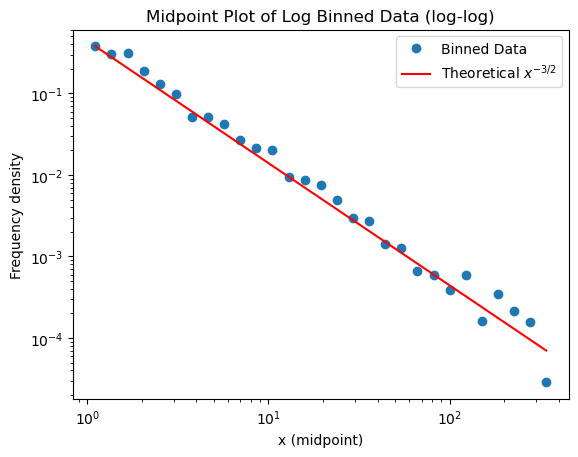

In [95]:
bins_log = np.logspace(np.log10(np.min(x)), np.log10(np.max(x)), num_bins)
counts_log, bin_edges_log = np.histogram(x, bins=bins_log)

bin_midpoints_log = np.sqrt(bin_edges_log[:-1] * bin_edges_log[1:])

bin_widths_log = bin_edges_log[1:] - bin_edges_log[:-1]

frequency_densities_log = counts_log / (num_samples * bin_widths_log)

nonzero_log = counts_log > 0
bin_midpoints_log_nonzero = bin_midpoints_log[nonzero_log]
frequency_densities_log_nonzero = frequency_densities_log[nonzero_log]

plt.plot(bin_midpoints_log_nonzero, frequency_densities_log_nonzero, 'o', label='Binned Data')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x (midpoint)')
plt.ylabel('Frequency density')
plt.title('Midpoint Plot of Log Binned Data (log-log)')

coeff_log = frequency_densities_log_nonzero[0] * bin_midpoints_log_nonzero[0]**(1.5)
x_fit_log = np.logspace(np.log10(np.min(bin_midpoints_log_nonzero)), np.log10(np.max(bin_midpoints_log_nonzero)), 100)
y_fit_log = coeff_log * x_fit_log**(-1.5)
plt.plot(x_fit_log, y_fit_log, 'r-', label=r'Theoretical $x^{-3/2}$')
plt.legend()
plt.show()

### Part e)

Firstly, logarithmic binning enhances visibility across scales, allowing us to observe the behavior of the data over several orders of magnitude. Power-law distributions often span a wide range, and logarithmic bins effectively accommodate this broad spectrum. In contrast, linear binning tends to cluster data in the lower x-values, making it challenging to identify patterns at higher x-values due to sparse data and statistical fluctuations.

Secondly, logarithmic bins increase in width as x increases, capturing more data points in the higher bins where data is naturally sparser. This results in improved statistical significance by reducing relative statistical fluctuations in counts at higher x-values. On the other hand, linear bins of equal width may contain very few or no counts at higher x-values, leading to unreliable estimates and noisy plots.

Thirdly, logarithmic binning aligns with the nature of power-law distributions, producing a straight line when plotting frequency versus x in log-log coordinates. This makes it easier to identify and confirm the power-law behavior and estimate the exponent. Linear binning does not facilitate such linearity in log-log plots, complicating the interpretation of the underlying distribution.

### Part f)

The rejection method would be slower than the inverse transform method for simulating this power-law distribution. The inverse transform method is more efficient because it directly maps uniformly distributed random numbers to the target distribution, requiring only one calculation per sample. In contrast, the rejection method can have a very low acceptance rate, especially for power-law distributions with a heavy tail like  x^{-3/2} , where the probability density decreases slowly. This means that many generated samples are rejected before a suitable one is accepted, significantly increasing the computational cost. For distributions with large or infinite support, the number of rejections can be substantial, making the rejection method inefficient. Therefore, the inverse transform method is more suitable and faster for this case.